In [1]:
#!pip install ewl

In [2]:
%matplotlib inline

In [3]:
from ewl import *

In [4]:
from qiskit.providers.aer.noise import NoiseModel
from qiskit.providers.aer.noise import QuantumError, ReadoutError
from qiskit.providers.aer.noise import pauli_error

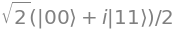

In [5]:
psi = (Qubit('00') + i * Qubit('11')) / sqrt2
psi

In [6]:
theta1, alpha1, beta1 = sp.symbols('theta1 alpha1 beta1')
alice = U(theta=theta1, alpha=alpha1, beta=beta1)
alice

⎡  ⅈ⋅α₁    ⎛θ₁⎞       ⅈ⋅β₁    ⎛θ₁⎞⎤
⎢ ℯ    ⋅cos⎜──⎟    ⅈ⋅ℯ    ⋅sin⎜──⎟⎥
⎢          ⎝2 ⎠               ⎝2 ⎠⎥
⎢                                 ⎥
⎢   -ⅈ⋅β₁    ⎛θ₁⎞   -ⅈ⋅α₁    ⎛θ₁⎞ ⎥
⎢ⅈ⋅ℯ     ⋅sin⎜──⎟  ℯ     ⋅cos⎜──⎟ ⎥
⎣            ⎝2 ⎠            ⎝2 ⎠ ⎦

In [7]:
theta2, alpha2, beta2 = sp.symbols('theta2 alpha2 beta2')
bob = U(theta=theta2, alpha=alpha2, beta=beta2)
bob

⎡  ⅈ⋅α₂    ⎛θ₂⎞       ⅈ⋅β₂    ⎛θ₂⎞⎤
⎢ ℯ    ⋅cos⎜──⎟    ⅈ⋅ℯ    ⋅sin⎜──⎟⎥
⎢          ⎝2 ⎠               ⎝2 ⎠⎥
⎢                                 ⎥
⎢   -ⅈ⋅β₂    ⎛θ₂⎞   -ⅈ⋅α₂    ⎛θ₂⎞ ⎥
⎢ⅈ⋅ℯ     ⋅sin⎜──⎟  ℯ     ⋅cos⎜──⎟ ⎥
⎣            ⎝2 ⎠            ⎝2 ⎠ ⎦

In [8]:
payoff_matrix = Array([
    [
        [3, 5],
        [0, 1],
    ],
    [
        [3, 0],
        [5, 1],
    ],
])
payoff_matrix

⎡⎡3  5⎤  ⎡3  0⎤⎤
⎢⎢    ⎥  ⎢    ⎥⎥
⎣⎣0  1⎦  ⎣5  1⎦⎦

In [9]:
p_error = 0.05
bit_flip = pauli_error([('X', p_error), ('I', 1 - p_error)])
phase_flip = pauli_error([('Z', p_error), ('I', 1 - p_error)])

In [10]:
noise_model = NoiseModel()
noise_model.add_all_qubit_quantum_error(bit_flip, ['u1', 'u2', 'u3'])
noise_model.add_all_qubit_quantum_error(phase_flip, ['x'], [0])
noise_model

<NoiseModel on ['u2', 'u3', 'x', 'u1']>

In [11]:
ewl = EWL(psi, [alice, bob], payoff_matrix, noise_model)
ewl

In [12]:
ewl_fixed = ewl.fix(theta1=pi / 2, alpha1=pi / 2, beta1=0,
                    theta2=0, alpha2=0, beta2=0)

{'00': 92, '10': 103, '01': 432, '11': 397}


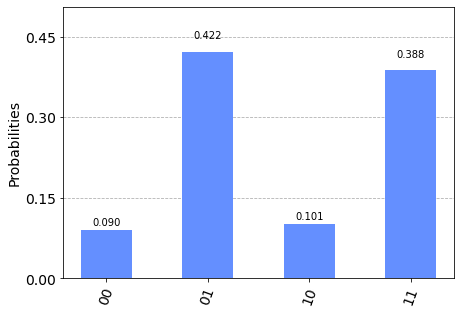

In [13]:
counts_qasm_simulator = ewl_fixed.simulate_counts()
print(counts_qasm_simulator)
plot_histogram(counts_qasm_simulator)
None

Job Status: job has successfully run
{'00': 59, '01': 549, '10': 34, '11': 382}


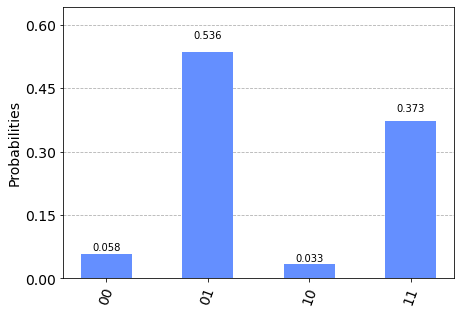

In [14]:
counts_quantum_device = ewl_fixed.run()
print(counts_quantum_device)
plot_histogram(counts_quantum_device)
None

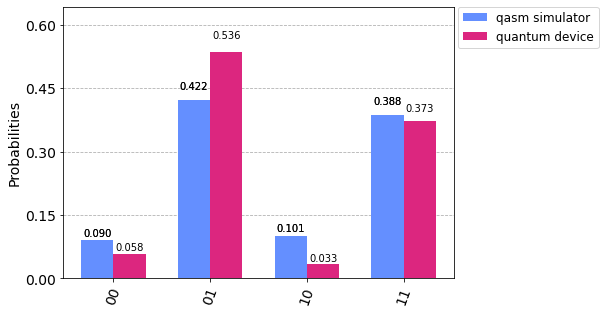

In [15]:
plot_histogram(data=[counts_qasm_simulator, counts_quantum_device],
               legend=['qasm simulator', 'quantum device'])
None